# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
# All import statements
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_path = ['..', '..', 'data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [6]:
df1 = pd.read_csv("Orange_Telecom_Churn_Data.csv")
print(df1)

     state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0       KS             128        415     382-4657        no             yes   
1       OH             107        415     371-7191        no             yes   
2       NJ             137        415     358-1921        no              no   
3       OH              84        408     375-9999       yes              no   
4       OK              75        415     330-6626       yes              no   
5       AL             118        510     391-8027       yes              no   
6       MA             121        510     355-9993        no             yes   
7       MO             147        415     329-9001       yes              no   
8       LA             117        408     335-4719        no              no   
9       WV             141        415     330-8173       yes             yes   
10      IN              65        415     329-6603        no              no   
11      RI              74        415   

I don't think these are good features to use when building a machine learning model. They do not have enough information contained in them which might be useful to train the model. Usability of a telecom network by a user is not dependent on the alloted phone number or area code and state (given the network provider has similar network coverage everyehere)

In [7]:
# Dropping the three columns
df1 = df1.drop(['state','area_code','phone_number'],axis=1)
df1.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [8]:
# Changing categorical columns to numeric
df1.intl_plan.replace(('yes', 'no'), (1, 0), inplace=True)
df1.voice_mail_plan.replace(('yes', 'no'), (1, 0), inplace=True)
df1.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# Scaling using Standard Scalar
temp = df1
df1 = df1.drop('churned',axis=1)
scale = StandardScaler()
scale_df1 = pd.DataFrame(scale.fit_transform(df1))

/Users/champ/anaconda3/envs/AdvancedText/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/champ/anaconda3/envs/AdvancedText/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
scale_df1.columns = df1.columns
scale_df1.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.698941,-0.323240,1.667120,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676
1,0.169849,-0.323240,1.667120,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676
2,0.925695,-0.323240,-0.599837,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236
3,-0.409634,3.093675,-0.599837,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885
4,-0.636388,3.093675,-0.599837,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [11]:
# Dividing Data
y = temp['churned']
X = scale_df1

In [12]:
# Fitting a K-NN model
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
pred = model.predict(X)

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [14]:
def accuracy(pred,y):
    return round(sum(pred==y)*100/len(y),2)
print('Accuracy is %s%%'%accuracy(pred,y))

Accuracy is 93.0%


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [15]:
# Case1
model2=KNeighborsClassifier(n_neighbors=3,weights='distance')
model2.fit(X,y)
pred=model2.predict(X)
print('Accuracy is %s%%'%accuracy(pred,y))

Accuracy is 100.0%


In 'uniform' weights all points in each neighborhood are weighted equally whereas in case of 'distance' the importance of the points is dependedent on the inverse of their distance.

So closer neighbors of a query point will have a greater influence than neighbors which are further away.

Since we are testing on the same data as trained on, the accuracy will always be 1

In [16]:
# Case 2
model3=KNeighborsClassifier(n_neighbors=3,p=1)
model3.fit(X,y)
pred=model3.predict(X)
print('Accuracy is %s%%'%accuracy(pred,y))

Accuracy is 94.0%


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [17]:
accuracies=np.zeros(20)

In [18]:
for i in range(20):
    model=KNeighborsClassifier(n_neighbors=i+1,p=1)
    model.fit(X,y)
    pred=model.predict(X)
    accuracies[i]=accuracy(pred,y)

In [19]:
accuracies

array([100.,  92.,  94.,  91.,  93.,  91.,  92.,  90.,  91.,  90.,  91.,
        90.,  90.,  89.,  90.,  89.,  90.,  89.,  89.,  89.])

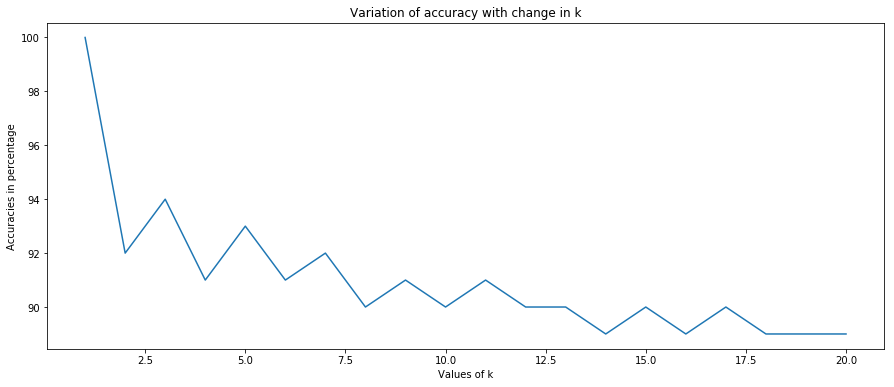

In [20]:
%matplotlib inline
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,21,1),accuracies)
plt.ylabel('Accuracies in percentage')
plt.xlabel('Values of k')
plt.title('Variation of accuracy with change in k')
plt.show()